# Exploration of Used_Cars Dataset
## by Tobi Adegoke

## Introduction
> The Dataset used is a Used_Cars Dataset gathered from Kaggle website. The Dataset contains 7906 Feature values and 18 feature labels of Used Cars in some state in USA. In this dataset, I am exploring to draw some insight which I wil be using for my explanatory part to communicate my findings.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# to silent warnigns
import warnings
warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
cars = pd.read_csv("UserCarData.csv")
cars.head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
5,6,Hyundai,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,Y
6,7,Maruti,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First_Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5,Y
7,8,Maruti,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4,Y
8,9,Toyota,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First_Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5,Y
9,10,Ford,2013,200000,169000,Central,Texas,Houston,Diesel,Individual,Manual,First_Owner,20.00,1399,68.10,160Nm@ 2000rpm,5,Y


In [5]:
# view the shape of the dataset
cars.shape

(7906, 18)

- the dataset consist of 7906 rows and 18 columns

In [6]:
# view duplicated rows
sum(cars.duplicated())

0

- no duplicated rows

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

- there are many labels in this dataset and I will be analysing few.

In [8]:
# list selected column
selected_columns = ['year','selling_price','km_driven','fuel','seller_type','transmission','owner','mileage',
                    'engine','max_power','seats']

cars_subset = cars[selected_columns]

In [9]:
# view dataset
cars_subset.sample(21)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4274,2014,550000,30000,Petrol,Individual,Manual,First_Owner,19.10,1197,85.80,5
4393,2016,1350000,97000,Diesel,Individual,Automatic,First_Owner,16.96,1968,138.03,5
1038,2016,650000,99000,Diesel,Dealer,Automatic,First_Owner,21.66,1498,103.52,5
5065,2015,450000,40000,Petrol,Individual,Manual,First_Owner,17.57,1193,88.70,5
7429,2018,280000,50000,Petrol,Individual,Manual,First_Owner,22.70,799,53.64,5
2208,2006,130000,80000,Petrol,Individual,Manual,Third_Owner,18.90,998,67.10,5
5712,2008,500000,154000,Diesel,Individual,Manual,Third_Owner,12.80,2494,102.00,8
5697,2020,925000,7400,Diesel,Individual,Automatic,First_Owner,24.30,1248,88.50,5
7671,2011,180000,90000,Diesel,Individual,Manual,Third_Owner,20.00,1399,68.00,5
3181,2016,950000,60000,Diesel,Individual,Manual,First_Owner,21.90,1498,98.60,7


In [10]:
# check dataset info
cars_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   int64  
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 679.5+ KB


- no missing values but wrong datatype

In [11]:
# list to categorize
to_categorize = ['year','fuel','seller_type','transmission','owner','seats']
for i in to_categorize:
    print('column name is: {}'.format(i))
    print('number of unique value is: {}\nunique list:\n{}'.format(cars_subset[i].nunique(),cars_subset[i].unique()))
    print('..............................................................................')

column name is: year
number of unique value is: 27
unique list:
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
..............................................................................
column name is: fuel
number of unique value is: 4
unique list:
['Diesel' 'Petrol' 'LPG' 'CNG']
..............................................................................
column name is: seller_type
number of unique value is: 3
unique list:
['Individual' 'Dealer' 'Trustmark_Dealer']
..............................................................................
column name is: transmission
number of unique value is: 2
unique list:
['Manual' 'Automatic']
..............................................................................
column name is: owner
number of unique value is: 5
unique list:
['First_Owner' 'Second_Owner' 'Third_Owner' 'Fourth_Above_Owner'
 'Test_Drive_Car']
................................

- years spread from 1994 to 2020 and will be orderly grouped for my analysis
- Dealer and Trustmark_Dealer are relatively the same and need to be combine as Dealer for my analysis
- Any of the used car could be Test_Drive_Cars, any rows with Test_Drive_Cars will be removed for my analysis.
- First, Second, Third, Fourth will be extracted from the value under owner column

In [12]:
# group years
cars_subset.loc[cars_subset["year"].isin([1994,1995,1996,1997,1998,1999,2000]),"year_group"] = "1994-2000"
cars_subset.loc[cars_subset["year"].isin([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]),"year_group"] = "2001-2010"
cars_subset.loc[cars_subset["year"].isin([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]),"year_group"] = "2011-2020"

In [13]:
# rename Trustmark_Dealers to Dealer
cars_subset.loc[cars_subset['seller_type']=="Trustmark_Dealer","seller_type"] = "Dealer"

In [14]:
# filter out rows with Test_Drive_Car
cars_subset = cars_subset[cars_subset["owner"]!="Test_Drive_Car"].reset_index(drop=True)

In [15]:
# extract the first words from the owner values
cars_subset["owner"] = cars_subset["owner"].apply(lambda value:value.split("_")[0])

In [16]:
# test to check changes
cars_subset["owner"].unique()

array(['First', 'Second', 'Third', 'Fourth'], dtype=object)

#### categorize the columns in to_categorize list to Categorical variable

In [17]:
# order to categorize
order_col = ["owner", "year_group", "seats"]
order_cat = [["Fourth","Third","Second","First"], ["1994-2000","2001-2010","2011-2020"], [2,4,5,6,7,8,9,10,14]]

# loop through to change the datatype
for col, cat in zip(order_col, order_cat):
    order = pd.api.types.CategoricalDtype(categories=cat, ordered = True)
    cars_subset[col] = cars_subset[col].astype(order)

In [18]:
# check for changes
print(cars_subset["owner"].unique())
print(cars_subset["year_group"].unique())
print(cars_subset["seats"].unique())

['First', 'Second', 'Third', 'Fourth']
Categories (4, object): ['Fourth' < 'Third' < 'Second' < 'First']
['2011-2020', '2001-2010', '1994-2000']
Categories (3, object): ['1994-2000' < '2001-2010' < '2011-2020']
[5, 4, 7, 8, 6, 9, 10, 14, 2]
Categories (9, int64): [2 < 4 < 5 < 6 ... 8 < 9 < 10 < 14]


In [19]:
# loop through to change the datatype
for i in ["fuel","seller_type","transmission"]:
    cars_subset[i] = cars_subset[i].astype("category")

In [20]:
# drop year column
cars_subset.drop(columns = "year",inplace=True)

In [21]:
# check dataset info
cars_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7901 entries, 0 to 7900
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  7901 non-null   int64   
 1   km_driven      7901 non-null   int64   
 2   fuel           7901 non-null   category
 3   seller_type    7901 non-null   category
 4   transmission   7901 non-null   category
 5   owner          7901 non-null   category
 6   mileage        7901 non-null   float64 
 7   engine         7901 non-null   int64   
 8   max_power      7901 non-null   float64 
 9   seats          7901 non-null   category
 10  year_group     7901 non-null   category
dtypes: category(6), float64(2), int64(3)
memory usage: 356.2 KB


In [22]:
# statistical view of numerical features
cars_subset.describe()

,selling_price,km_driven,mileage,engine,max_power
count,7.901000e+03,7.901000e+03,7901.000000,7901.000000,7901.000000
mean,6.474381e+05,6.922319e+04,19.421449,1458.531958,91.542652
std,8.063619e+05,5.679331e+04,4.036465,503.994359,35.704798
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000
25%,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000
75%,6.900000e+05,9.600000e+04,22.320000,1582.000000,102.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000


### What is the structure of your dataset?

> The dataset consist of 7906 rows and 18 columns. For the purpose of my analysis, I selected 11 columns from the dataset and asfter pre-wrangling of the selected dataset, the selected dataset now has 7901 rows and 11 columns with 6 categorical variables and  5 numerical variables.

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is to answer a question What feature(s) that effect Selling Price of Used Cars?. features that can be used to predict the selling price of used cars.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> km_driven, mileage, engine, max_power, seller_type, owner, year_group, transmission, fuel, and seats.

## Univariate Exploration

### plotting the distribution of the selling price 

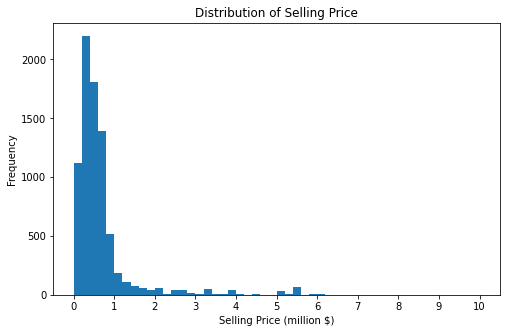

In [23]:
# plot
plt.figure(figsize = [8,5])
color = sb.color_palette()[0]

bins = 200000;
max_p = cars_subset["selling_price"].max()

binz = np.arange(0,max_p + bins, bins)
plt.hist(data = cars_subset, x = "selling_price", bins = binz)
plt.xticks([0,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,1e7],[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Selling Price (million $)')
plt.ylabel('Frequency');
plt.title('Distribution of Selling Price');

- it is right skewed, majority of the cars are selling at low price.

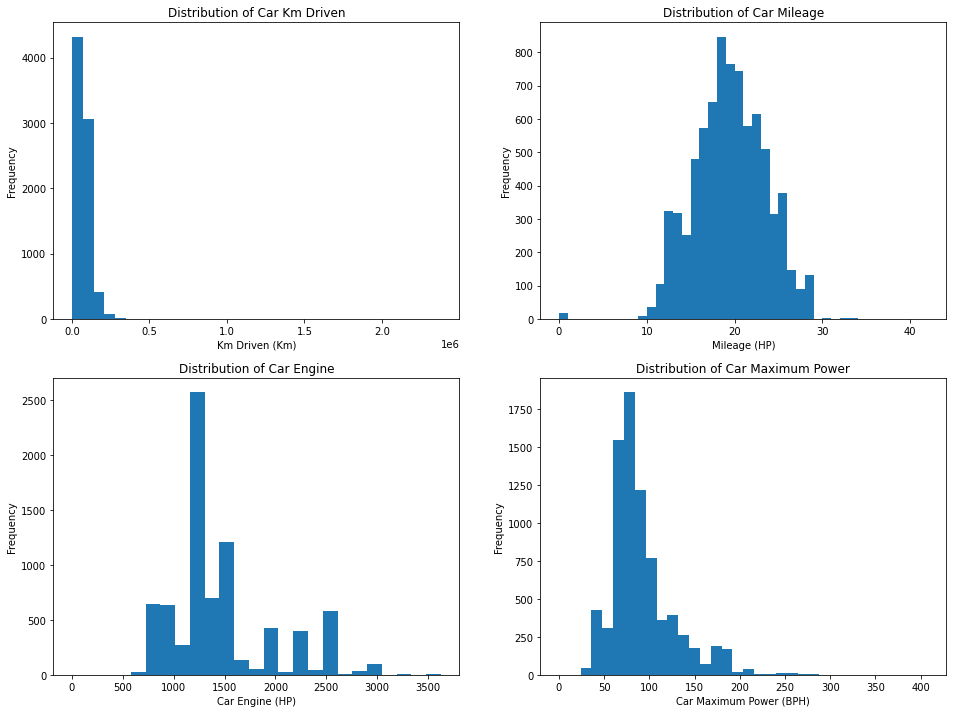

In [24]:
# plot
plt.figure(figsize = [16,12])
color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
bins = 70000;
max_p = cars_subset["km_driven"].max()
binz = np.arange(0,max_p + bins, bins)
plt.hist(data = cars_subset, x = "km_driven", bins = binz)
plt.xlabel('Km Driven (Km)')
plt.ylabel('Frequency');
plt.title('Distribution of Car Km Driven');

plt.subplot(2, 2, 2)
bins = 1;
max_p = cars_subset["mileage"].max()
binz = np.arange(0,max_p + bins, bins)
plt.hist(data = cars_subset, x = "mileage", bins = binz)
plt.xlabel('Mileage (HP)')
plt.ylabel('Frequency');
plt.title('Distribution of Car Mileage');

plt.subplot(2, 2, 3)
bins = 145;
max_p = cars_subset["engine"].max()
binz = np.arange(0,max_p + bins, bins)
plt.hist(data = cars_subset, x = "engine", bins = binz)
plt.xlabel('Car Engine (HP)')
plt.ylabel('Frequency');
plt.title('Distribution of Car Engine');

plt.subplot(2, 2, 4)
bins = 12;
max_p = cars_subset["max_power"].max()
binz = np.arange(0,max_p + bins, bins)
plt.hist(data = cars_subset, x = "max_power", bins = binz)
plt.xlabel('Car Maximum Power (BPH)')
plt.ylabel('Frequency');
plt.title('Distribution of Car Maximum Power');

- most of the cars are less driven
- most of the car mileage are between 10 km/galon and 28 km/galon
- the car engine are right skewed with spikes
- most of the car maximum power are low as the plot is right skewed.

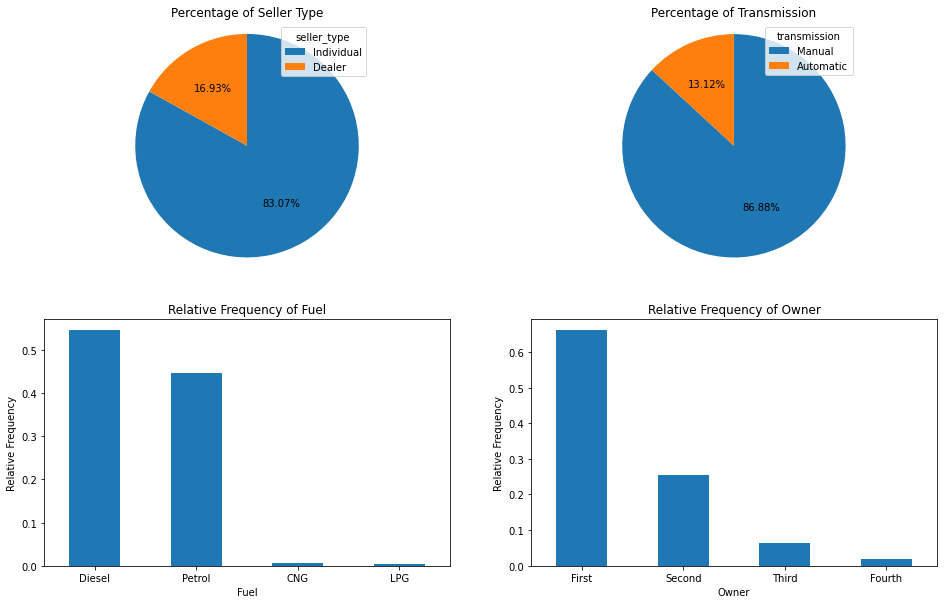

In [25]:
# plot
plt.figure(figsize = [16,10])
color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
type_sort = cars_subset["seller_type"].value_counts()
plt.pie(type_sort, labels = None, startangle = 90, counterclock = False,autopct="%1.2f%%")
plt.axis('square')
plt.title("Percentage of Seller Type")
plt.legend(title = "seller_type",labels = type_sort.index);

plt.subplot(2, 2, 2)
transmission_sort = cars_subset["transmission"].value_counts()
plt.pie(transmission_sort, labels = None, startangle = 90, counterclock = False,autopct="%1.2f%%")
plt.axis('square')
plt.title("Percentage of Transmission")
plt.legend(title = "transmission",labels = transmission_sort.index);

plt.subplot(2, 2, 3)
cars_subset["fuel"].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation = 0)
plt.xlabel("Fuel")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Fuel");

plt.subplot(2, 2, 4)
cars_subset["owner"].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation = 0)
plt.xlabel("Owner")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Owner");

- 83% of the cars are on sale by Individual
- 86.9% of the cars are Manual transmission
- most of the cars uses diesel or petrol
- interesting to see that most of the cars are first owner followed by second, third and then fourth

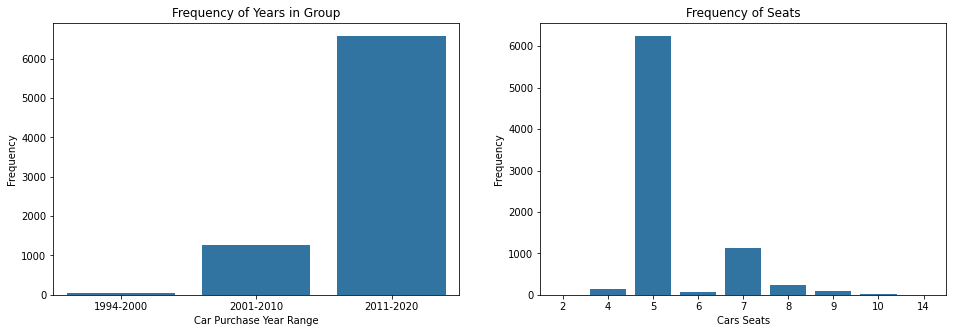

In [26]:
# plot
plt.figure(figsize = [16,5])
color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.countplot(data = cars_subset, x = "year_group", color = color)
plt.xlabel("Car Purchase Year Range")
plt.ylabel("Frequency");
plt.title("Frequency of Years in Group");

plt.subplot(1, 2, 2)
sb.countplot(data = cars_subset, x = "seats",  color = color)
plt.xlabel("Cars Seats")
plt.ylabel("Frequency");
plt.title("Frequency of Seats");

- most cars are recently puchased (2011-2020) followed by 2001-2010 and least is 1994-2000
- Most cars are 5 seaters follow by 7 seater.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the selling price of most of the cars are of low prices.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I only change the bin sizes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [27]:
# list of numerical and categorical variables
categorical = ["seller_type","transmission","fuel","owner","year_group","seats"]
numerical = ["selling_price","km_driven","mileage","engine","max_power"]

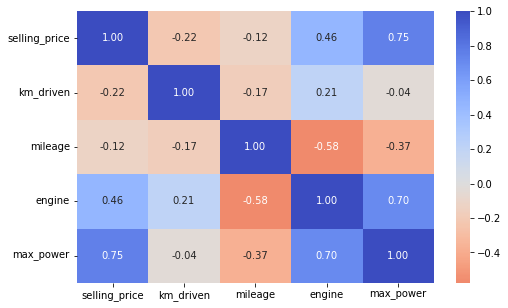

In [28]:
# correlation plots among numericals
plt.figure(figsize=[8,5])
sb.heatmap(cars_subset[numerical].corr(), annot = True, fmt = '0.2f', cmap = 'coolwarm_r', center = 0);

- max_power, engine have correlation with selling price
- mileage and engine are correlated
- max_power and engine are correlated

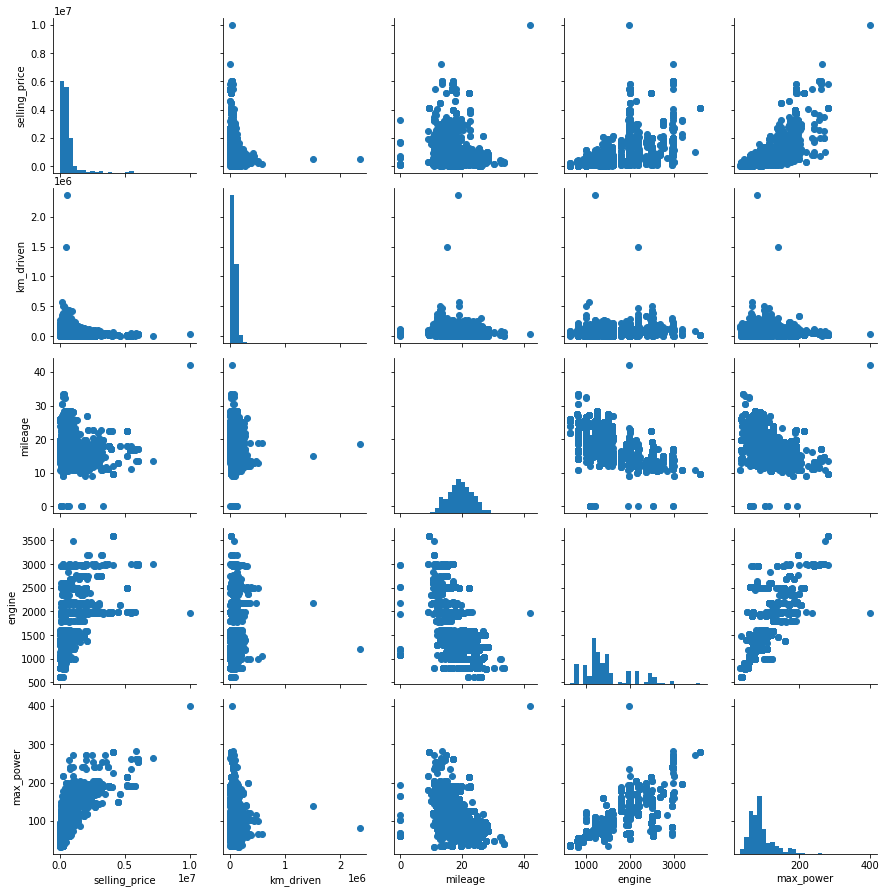

In [29]:
# plots of correlation among numerical variables
g = sb.PairGrid(data = cars_subset, vars = numerical)
g = g.map_diag(plt.hist, bins = 30)
g.map_offdiag(plt.scatter);

- max_power is more positive correlated with selling price than engine with selling price.

#### correlation between selling price and max_power, engine

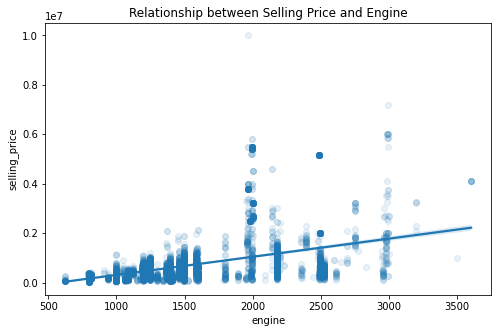

In [30]:
# Plots of correlation between selling price and engine
plt.figure(figsize = [8,5])
sb.regplot(data = cars_subset, x = "engine", y = "selling_price", y_jitter = 0.3, scatter_kws={"alpha": 1/10})
plt.title("Relationship between Selling Price and Engine");

- engine is positive correlated with selling price

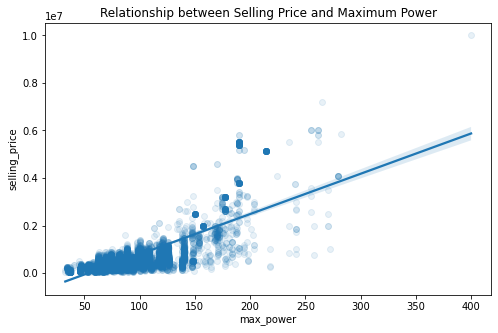

In [31]:
# plots of selling price and maximum power correlation
plt.figure(figsize = [8,5])
sb.regplot(data = cars_subset, x = "max_power", y = "selling_price", y_jitter = 0.3, scatter_kws={"alpha": 1/10})
plt.title("Relationship between Selling Price and Maximum Power");

- selling price and maximum power are strongly correlated

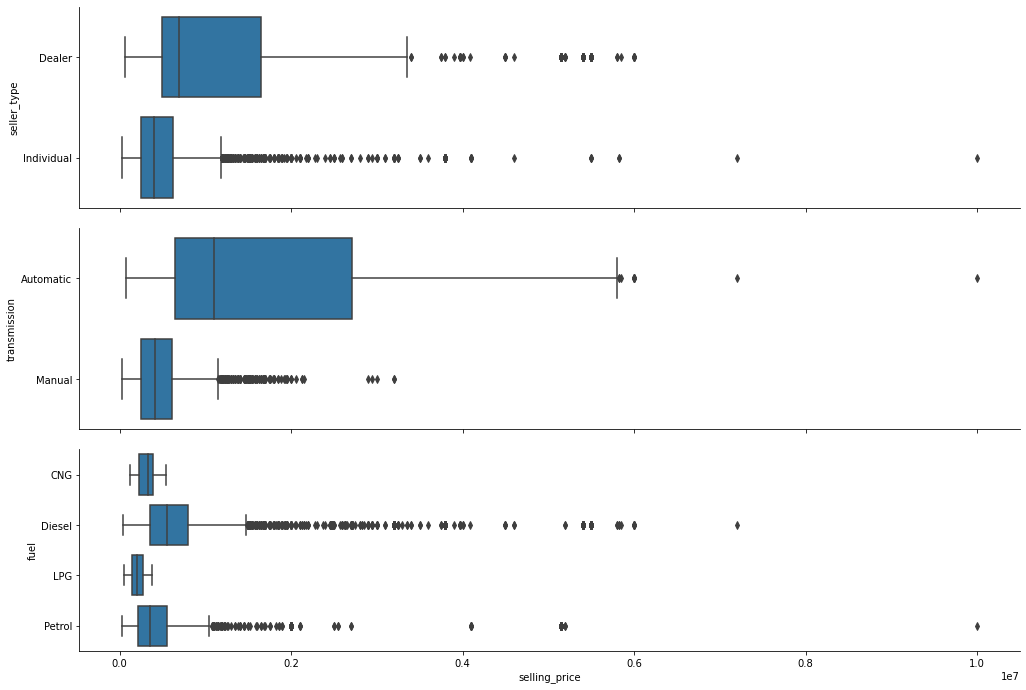

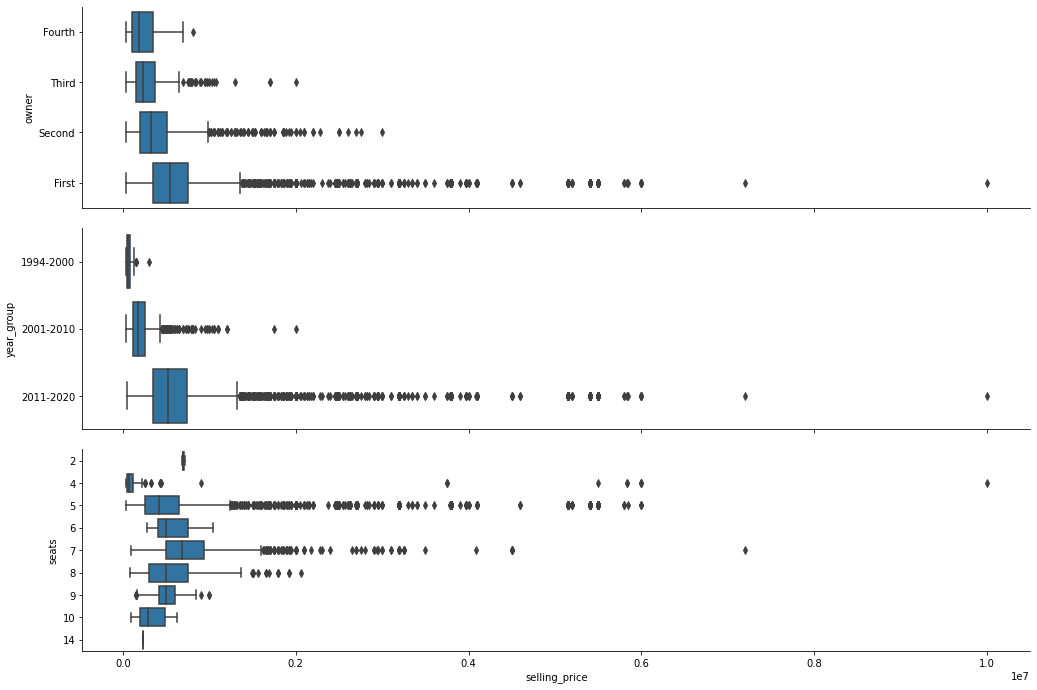

In [32]:
# plots of correlation between selling price and all categorical variables
categorical = [["seller_type","transmission","fuel"],["owner","year_group","seats"]]
for feature in categorical:
    color = sb.color_palette()[0]
    g = sb.PairGrid(data = cars_subset, y_vars =feature, x_vars = "selling_price")
    g.map(sb.boxplot, color = color)
    g.fig.set_size_inches(20,10);

- Dealer sales cars are expensive than Individual but they both have outliers
- Automatic cars are expensive than Manual cars, they both have outliers
- the order of expensive to cheap cars in fuel is from Diesel to Petrol, then CNG and LPG with order of outliers
- the order of cheap to expensive cars in owner is from fourth to third, then second and first with order of outliers
- the order of cheap to expensive cars in year is from 1994-2000 to 2001-2010 then 2011-2020 beign  the expensive
- 7 seater are more expensive, followed by 6,8,and 2 then 5,9, then 10 and 14 and 4 seater being the cheapest

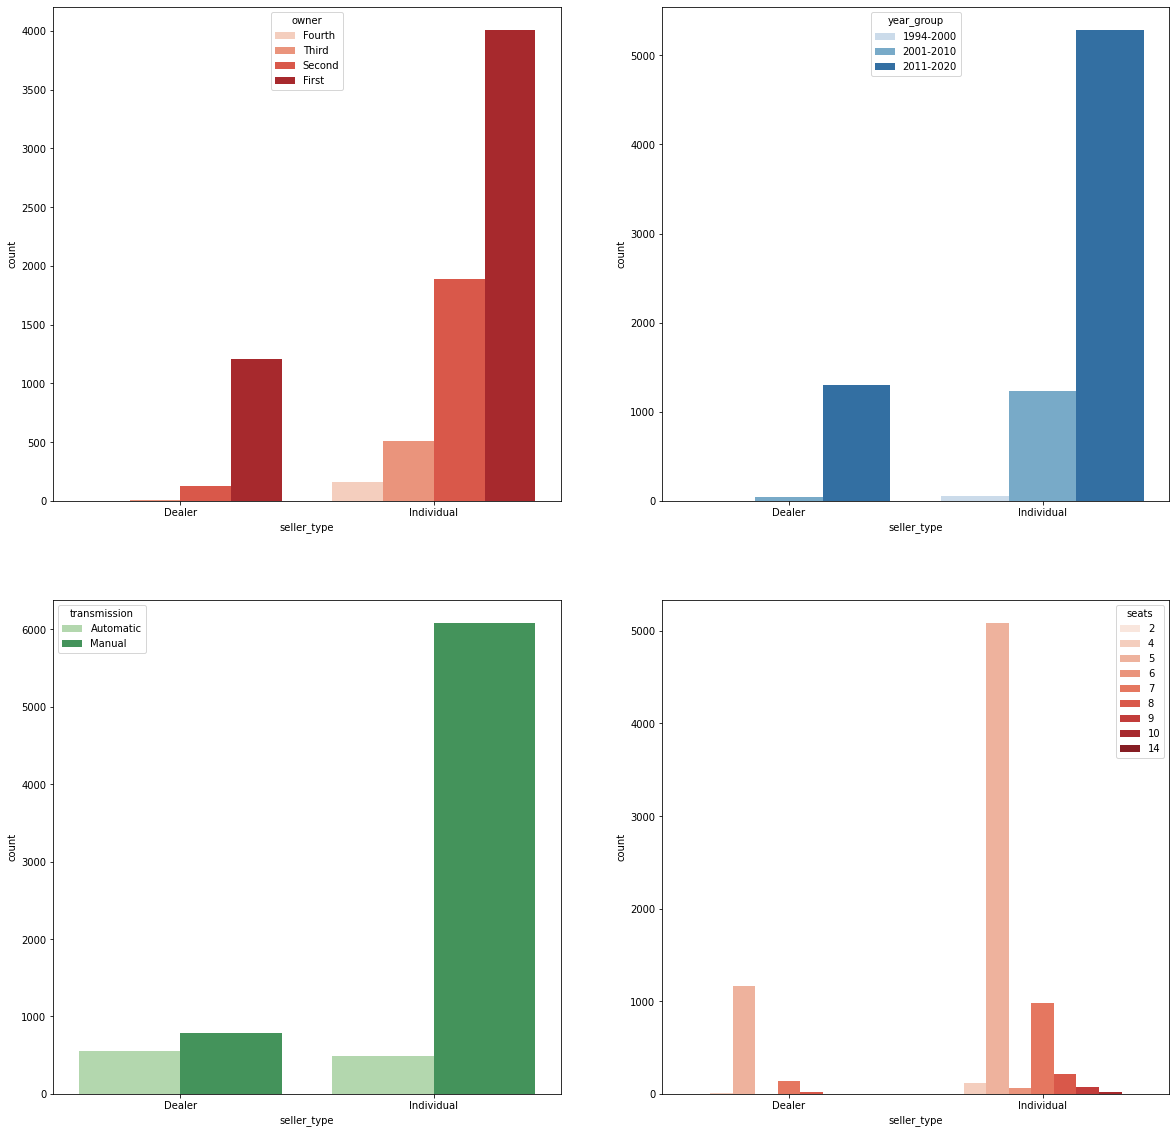

In [33]:
# subset plots for relationship between categorical variables
plt.figure(figsize = [20, 20])

# subplot 1: seller_type vs owner
plt.subplot(2, 2, 1)
sb.countplot(data = cars_subset, x = "seller_type", hue = "owner", palette = "Reds")

# subplot 2: seller_type vs year_group
ax = plt.subplot(2, 2, 2)
sb.countplot(data = cars_subset, x = "seller_type", hue = "year_group", palette = "Blues")

# subplot 3: seller_type vs transmission
ax = plt.subplot(2, 2, 3)
sb.countplot(data = cars_subset, x = "seller_type", hue = "transmission", palette = "Greens")

# subplot 4: seller_type vs seats
ax = plt.subplot(2, 2, 4)
sb.countplot(data = cars_subset, x = "seller_type", hue = "seats", palette = "Reds")

plt.show()

- most of the cars of the seller type are first owner, purchased between 2011-2020, 5 seaters.
- interesting to see automatic gaining relatively high in Dealer seller type compare to Individual

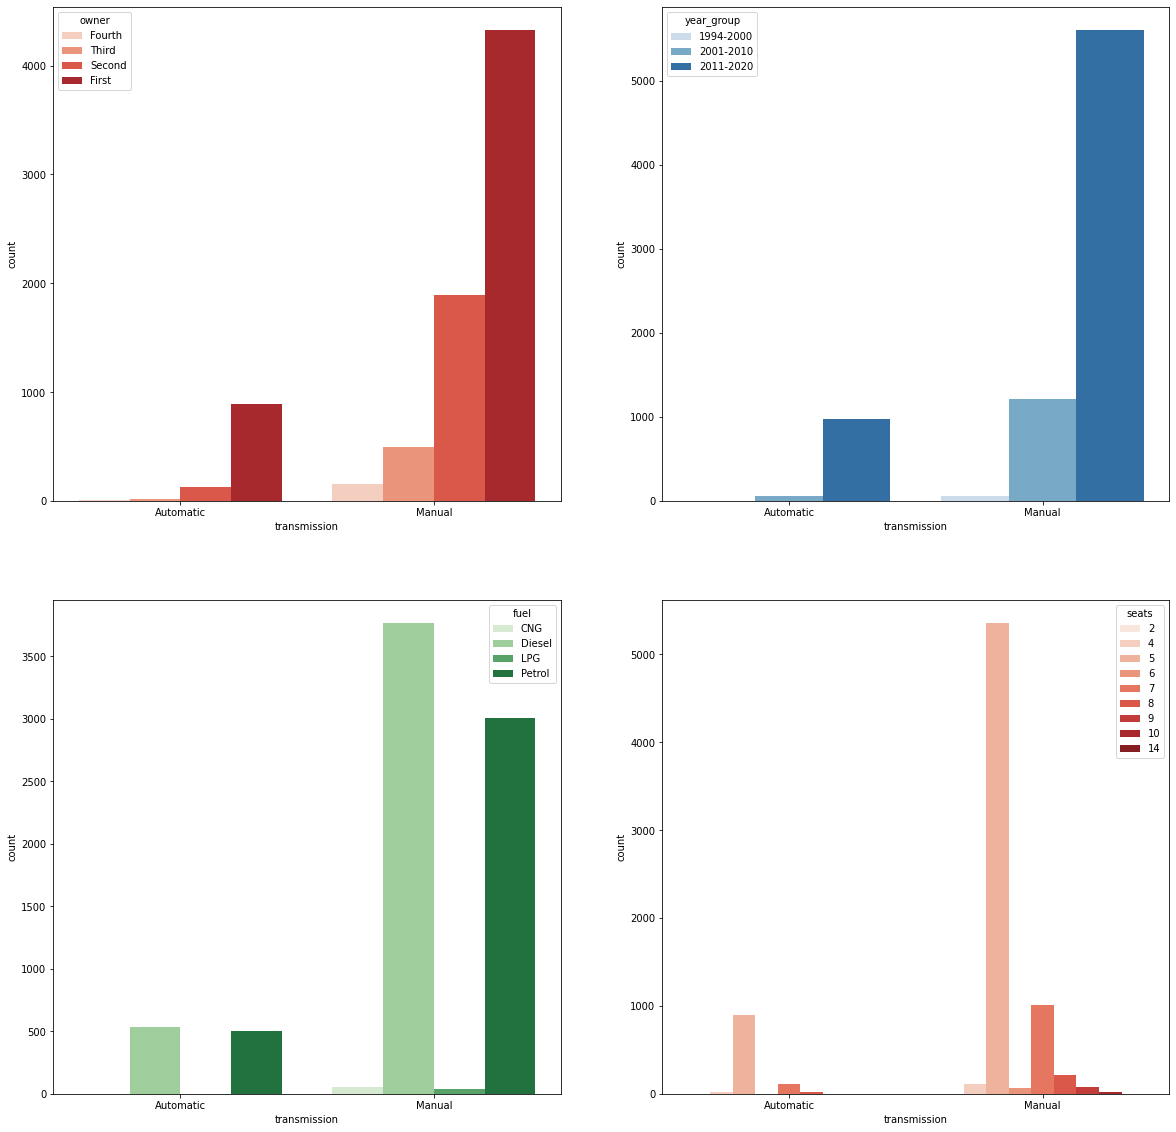

In [34]:
# subset plots for relationship between categorical variables
plt.figure(figsize = [20, 20])

# subplot 1: seller_type vs owner
plt.subplot(2, 2, 1)
sb.countplot(data = cars_subset, x = "transmission", hue = "owner", palette = "Reds")

# subplot 2: seller_type vs year_group
ax = plt.subplot(2, 2, 2)
sb.countplot(data = cars_subset, x = "transmission", hue = "year_group", palette = "Blues")

# subplot 3: seller_type vs transmission
ax = plt.subplot(2, 2, 3)
sb.countplot(data = cars_subset, x = "transmission", hue = "fuel", palette = "Greens")

# subplot 4: seller_type vs seats
ax = plt.subplot(2, 2, 4)
sb.countplot(data = cars_subset, x = "transmission", hue = "seats", palette = "Reds")

plt.show()

- most of the transmission cars are first owner, recently purchased, used Diesel/petrol, annd 5 seaters
- Automatic cars uses petrol is of same propotion to those using diesel.

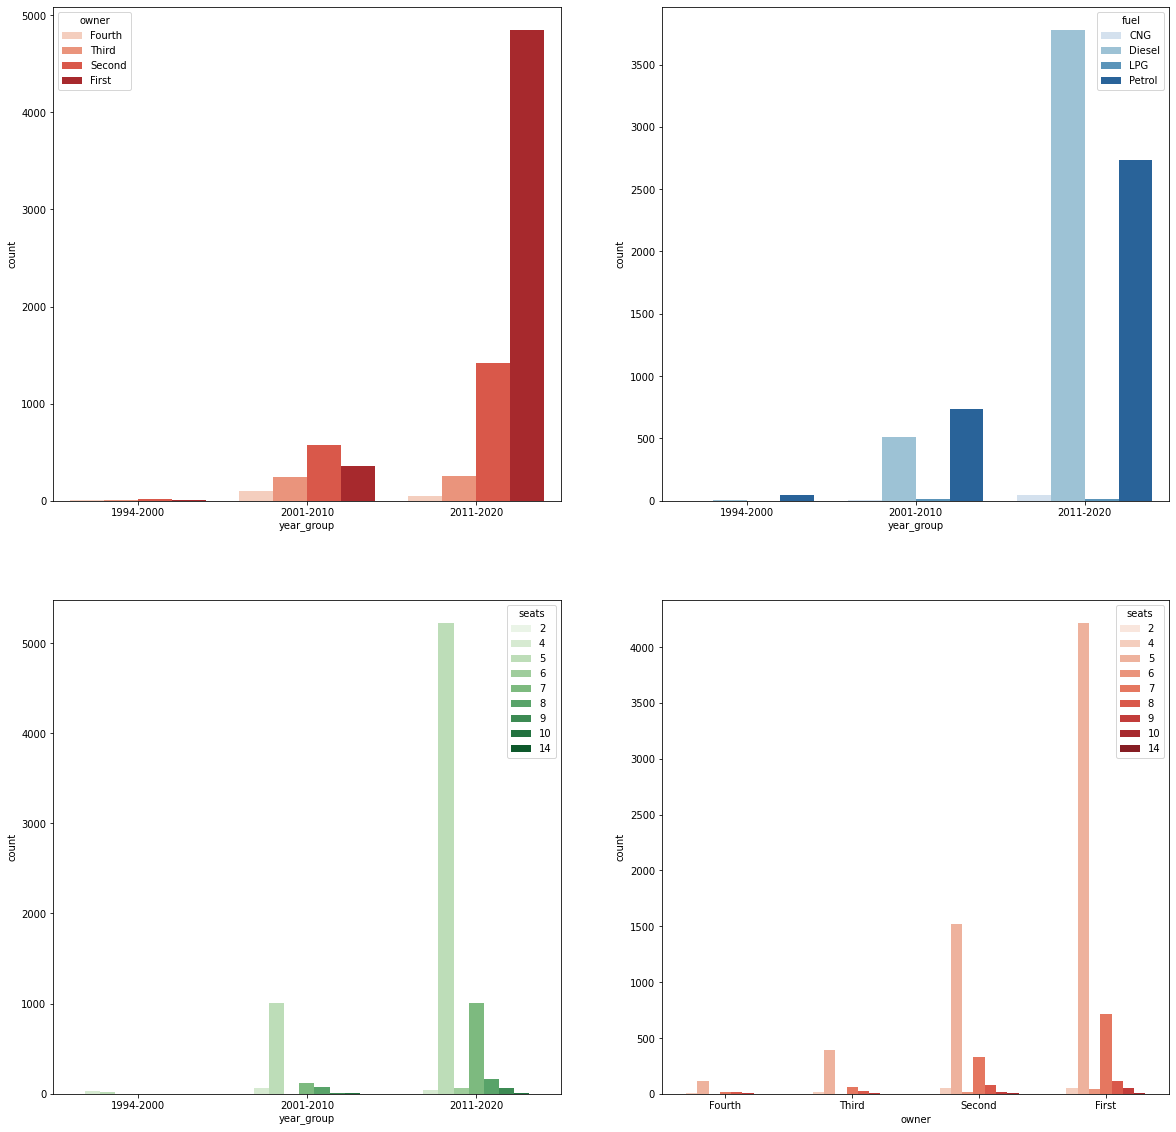

In [35]:
# subset plots for relationship between categorical variables
plt.figure(figsize = [20, 20])

# subplot 1: seller_type vs owner
plt.subplot(2, 2, 1)
sb.countplot(data = cars_subset, x = "year_group", hue = "owner", palette = "Reds")

# subplot 2: seller_type vs year_group
ax = plt.subplot(2, 2, 2)
sb.countplot(data = cars_subset, x = "year_group", hue = "fuel", palette = "Blues")

# subplot 3: seller_type vs transmission
ax = plt.subplot(2, 2, 3)
sb.countplot(data = cars_subset, x = "year_group", hue = "seats", palette = "Greens")

# subplot 4: seller_type vs seats
ax = plt.subplot(2, 2, 4)
sb.countplot(data = cars_subset, x = "owner", hue = "seats", palette = "Reds")

plt.show()

- majority of the recently purchased cars are first owner, uses diesel and petrol, 5 seaters.
- cars using diesel gains popularity in 2011-2020.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Max_power and engine are correlated with selling price, selling price and km driven are less negative correlated

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> maximum power and engine are positively correlated.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### the relationship between owner, selling price and year

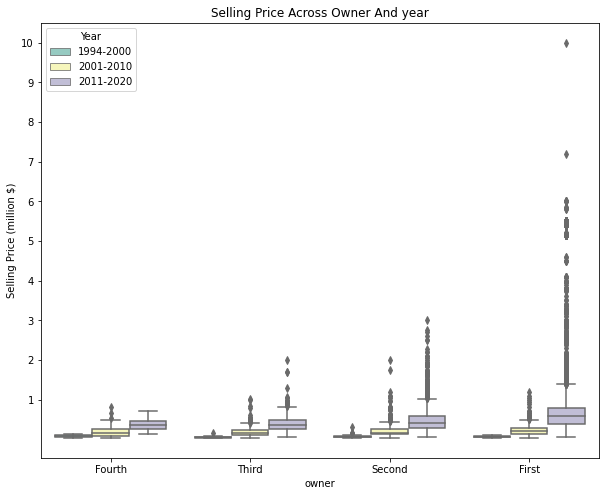

In [36]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(data=cars_subset, x="owner", y="selling_price", hue="year_group", palette="Set3")
plt.title('Selling Price Across Owner And year')
plt.yticks([1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,1e7],[1,2,3,4,5,6,7,8,9,10])
plt.ylabel("Selling Price (million $)")
plt.legend(title = 'Year');

- year and owner are positively related with selling price

#### the relationship between seller type, selling price and transmission

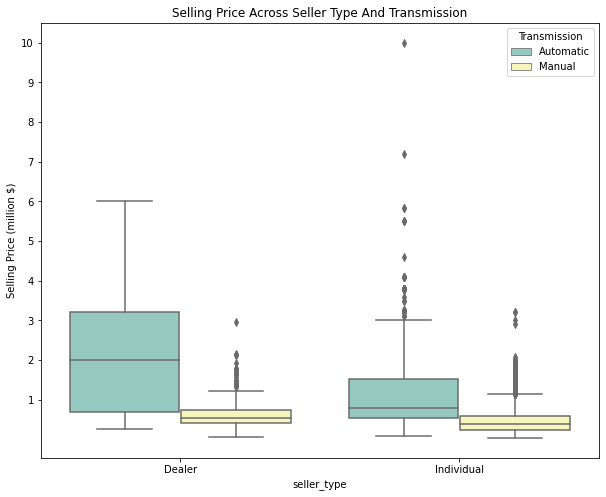

In [37]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(data=cars_subset, x="seller_type", y="selling_price", hue="transmission", palette="Set3")
plt.title('Selling Price Across Seller Type And Transmission')
plt.yticks([1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,1e7],[1,2,3,4,5,6,7,8,9,10])
plt.ylabel("Selling Price (million $)")
plt.legend(title = 'Transmission');

- seller type and transmission are related with selling price

#### the relationship between maximum power, selling price and transmission

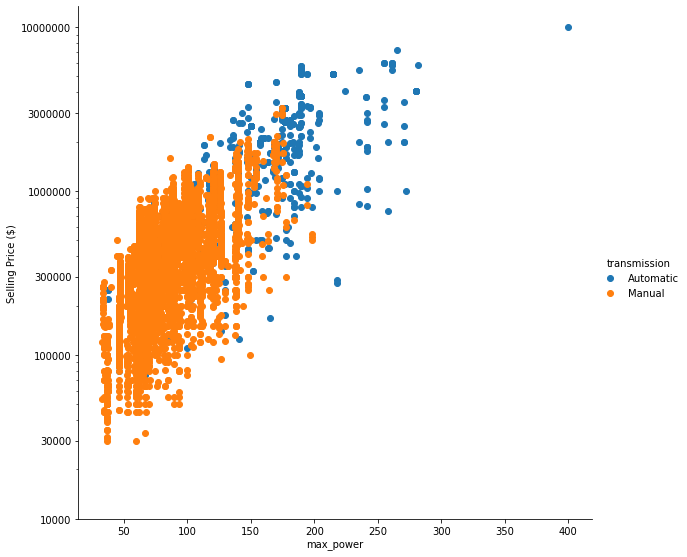

In [38]:
g = sb.FacetGrid(data =cars_subset,  hue = 'transmission', size = 8)
g.map(plt.scatter, 'max_power', 'selling_price')
plt.yscale('log')
plt.yticks([1e4,3e4,1e5,3e5,1e6,3e6,1e7],[10000,30000,100000,300000,1000000,3000000,10000000])
plt.ylabel("Selling Price ($)")
g.add_legend();

- transmision, max_power and selling price are positively related

#### the relationship between maximum power, selling price and year

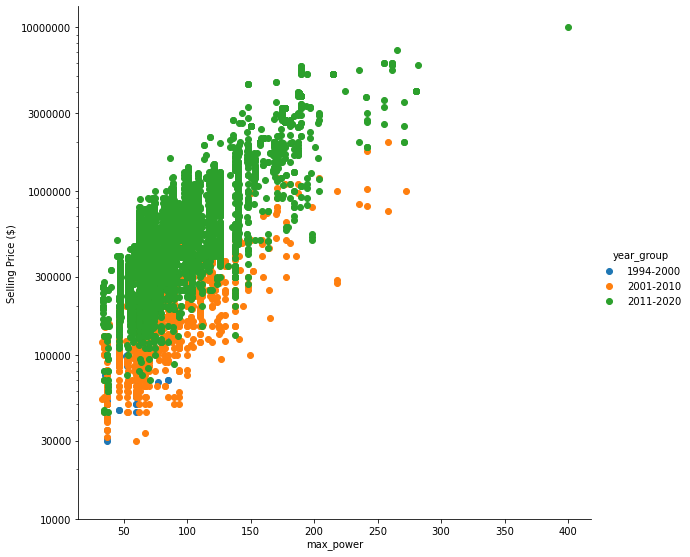

In [39]:
g = sb.FacetGrid(data =cars_subset,  hue = 'year_group', size = 8)
g.map(plt.scatter, 'max_power', 'selling_price')
plt.yscale('log')
plt.yticks([1e4,3e4,1e5,3e5,1e6,3e6,1e7],[10000,30000,100000,300000,1000000,3000000,10000000])
plt.ylabel("Selling Price ($)")
g.add_legend();

- year, max_power and selling price are positively related

#### the relationship between maximum power, selling price and owner

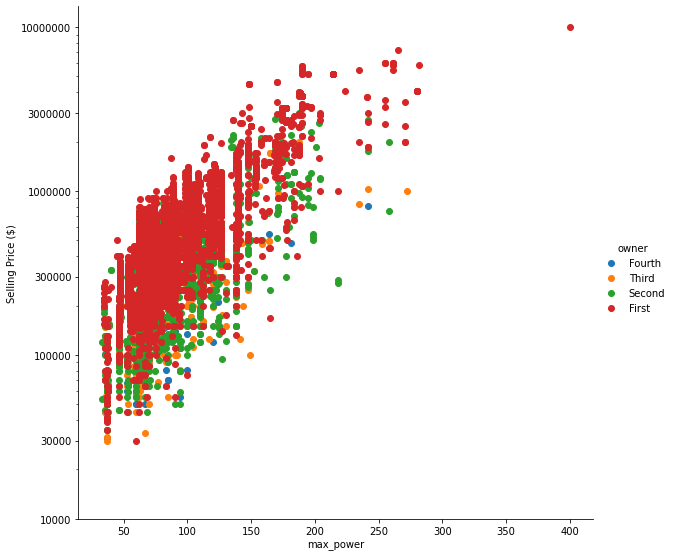

In [40]:
g = sb.FacetGrid(data =cars_subset,  hue = 'owner', size = 8)
g.map(plt.scatter, 'max_power', 'selling_price')
plt.yscale('log')
plt.yticks([1e4,3e4,1e5,3e5,1e6,3e6,1e7],[10000,30000,100000,300000,1000000,3000000,10000000])
plt.ylabel("Selling Price ($)")
g.add_legend();

- owner, max_power and selling price are positively related

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Transmission,Year,owner, max_power and selling price are strongly related

### Were there any interesting or surprising interactions between features?

> owner and year are related, seller_type and transmission are related

## Conclusions
> I found that cars maximum power, seller type, owner, transmission, year are good predictor of cars selling price.
> Recently bought first owner Automatic car using diesel/petrol fuel are more expensive than old bought second owner manual cars using CNG/LPG fuel. 
